## **FASHION_MNIST CNN MODEL**

In [ ]:
# Importing Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf

### **IMPORTING DATASET FROM KERAS**

In [ ]:
# Importing fashion_mnist dataset from keras

from keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### **The MNSIT fashion dataset has the following label map of clothing:**

0: T-shirt/top 

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

In [ ]:
# Find the unique labels (as numbers in this case)
labels_unique = np.unique(y_train)

# Find the total number of unique classes
num_classes = len(labels_unique)

print('Total number of classes : ', num_classes)

print('Unique labels : ', labels_unique)

Total number of classes :  10
Unique labels :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Printing shape of training and testing data

print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)
print('y_train.shape:', y_train.shape)

X_train.shape: (60000, 28, 28)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)
y_train.shape: (60000,)


## **VIRTUALIZE DATA**

4


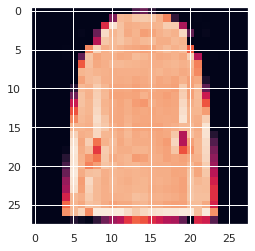

In [ ]:
# Visualizing image in training dataset

import matplotlib.pyplot as plt
i = 2000
plt.imshow(X_train[i])
print(y_train[i])

8


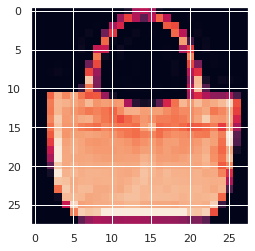

In [ ]:
i = 100
plt.imshow(X_train[i])
print(y_train[i])

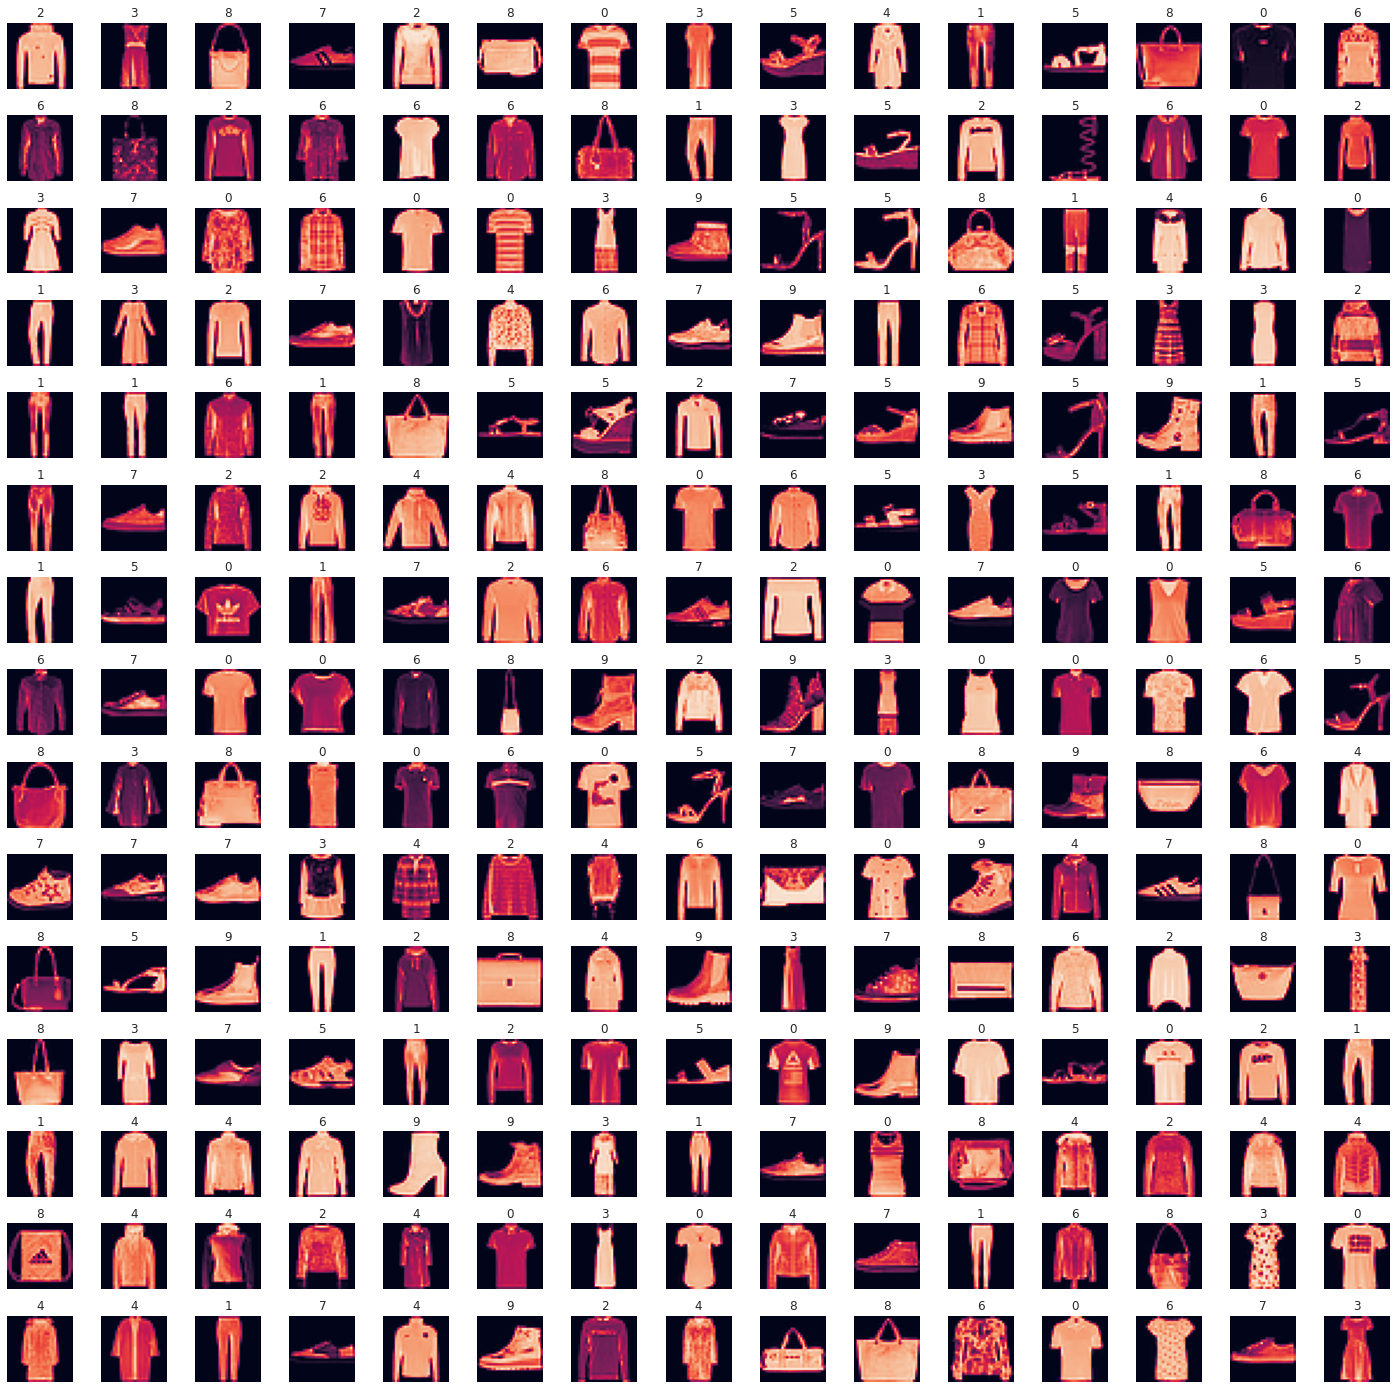

In [ ]:
# Printing matrix of 15 images

W_grid = 15      # width of the grid
L_grid = 15      # length of the grid 

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) # create grid of figsize = (25, 25)
axes = axes.ravel() # ravel is to flatten the matrix into 225 array.

n_training = len(X_train) # till here it will just create the empty grid.

# plotting certain image at every single location within our grid

for i in np.arange(0, L_grid * W_grid):         
    index= np.random.randint(0, n_training)   # create random integers that range between 0 and 60000 
    axes[i].imshow(X_train[index])            # to visualize the image contained within the random index
    axes[i].set_title(y_train[index])         # adding lablel as the title of image
    axes[i].axis('off')                       # removing axes values of the pixels
    
plt.subplots_adjust(hspace = 0.4)             # changing spacing between tje image

## **DATA PREPARATION**

In [ ]:
# No. of categories

number_cat = 10

In [ ]:
y_train # decimal value

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
import keras
from keras.utils import np_utils

# Converting decimal value in to binary (one-hot encoding)

y_train = keras.utils.np_utils.to_categorical(y_train, number_cat)
y_test = keras.utils.np_utils.to_categorical(y_test, number_cat)

In [ ]:
y_train # converted decimal value in to binary format

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# reshape dataset to have a single channel for model

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_train = X_train/255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_test = X_test/255.0

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
input_shape = X_train.shape[1:]
print(input_shape)

(28, 28, 1)


## **TRAIN THE MODEL**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.layers import Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import TensorBoard 

In [ ]:
# build the network
# first created a Con2D to perform convolution process. 
# Then create 32 filters. Each filter consists of 3*3 matrix (kernel_size) with an activation function of RELU.
# Input shape is the dimension of the image which is 28*28. Needed only for Input layer.

model_Fmnist1 = Sequential()
model_Fmnist1.add(Conv2D(filters = 32, kernel_size = (3,3), kernel_initializer='he_uniform', activation = 'relu', input_shape = (28, 28, 1)))
model_Fmnist1.add(MaxPooling2D(2,2))
model_Fmnist1.add(Dropout(0.2))

# Adding more layer to increase the depth of the network

model_Fmnist1.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model_Fmnist1.add(MaxPooling2D(2,2))
model_Fmnist1.add(Dropout(0.2))

model_Fmnist1.add(Flatten())

# Creating fully connected artificial neural network, which uses Dense 
model_Fmnist1.add(Dense(units = 1024, activation = 'relu', kernel_initializer='he_uniform'))
model_Fmnist1.add(Dense(units = 512, activation = 'relu', kernel_initializer='he_uniform'))

# Output layer: Because using classification, so have to classify data into 10 classes.
# objective is to classify 10 classes. And as dataset has 10 classes so the output has to have 10 values
model_Fmnist1.add(Dense(units = 10, activation = 'softmax'))  # softmax: as predicts a multinomial probability distribution 
 

In [ ]:
# Compiling model SGD optimizer

epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum = 0.9, decay = decay, nesterov=False)
model_Fmnist1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model_Fmnist1.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 5, 5, 64)         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Use fit method to train model using training data

history = model_Fmnist1.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))

Epoch 1/12
1875/1875 [==============================] - 130s 69ms/step - loss: 0.5237 - accuracy: 0.8053 - val_loss: 0.3931 - val_accuracy: 0.8535
Epoch 2/12
1875/1875 [==============================] - 124s 66ms/step - loss: 0.3655 - accuracy: 0.8657 - val_loss: 0.3380 - val_accuracy: 0.8782
Epoch 3/12
1875/1875 [==============================] - 133s 71ms/step - loss: 0.3271 - accuracy: 0.8794 - val_loss: 0.3147 - val_accuracy: 0.8876
Epoch 4/12
1875/1875 [==============================] - 126s 67ms/step - loss: 0.3095 - accuracy: 0.8858 - val_loss: 0.3002 - val_accuracy: 0.8928
Epoch 5/12
1875/1875 [==============================] - 124s 66ms/step - loss: 0.2951 - accuracy: 0.8910 - val_loss: 0.2896 - val_accuracy: 0.8988
Epoch 6/12
1875/1875 [==============================] - 124s 66ms/step - loss: 0.2875 - accuracy: 0.8937 - val_loss: 0.2829 - val_accuracy: 0.8996
Epoch 7/12
1875/1875 [==============================] - 124s 66ms/step - loss: 0.2820 - accuracy: 0.8954 - val_loss: 0

## **EVALUATE THE MODEL**

In [ ]:
# Final evaluation of the model using testing data and get the score

scores=model_Fmnist1.evaluate(X_test, y_test, verbose=0)
print("Accuracy = %.2f%% " % (scores[1]*100))# Evaluation have two values validation and accuracy, so using [1] to get accuracy

Accuracy = 90.58% 


In [ ]:
# Feedinf X_test data into the model and detemining what are the predicted classes going to be.

predict_x = model_Fmnist1.predict(X_test) 
classes_x = np.argmax(predict_x,axis=1)
classes_x # outputs the classes model is predicting for test data

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Comparing the predicted classes to the true label(y_test)
# Returning all the binary value to decimal to copare with predicted classes

y_test = y_test.argmax(1)
print(y_test)

[9 2 1 ... 8 1 5]


In [ ]:
# Reshaping X_test to plot the matrix for prediction

X_test = X_test.reshape((X_test.shape[0], 28, 28))

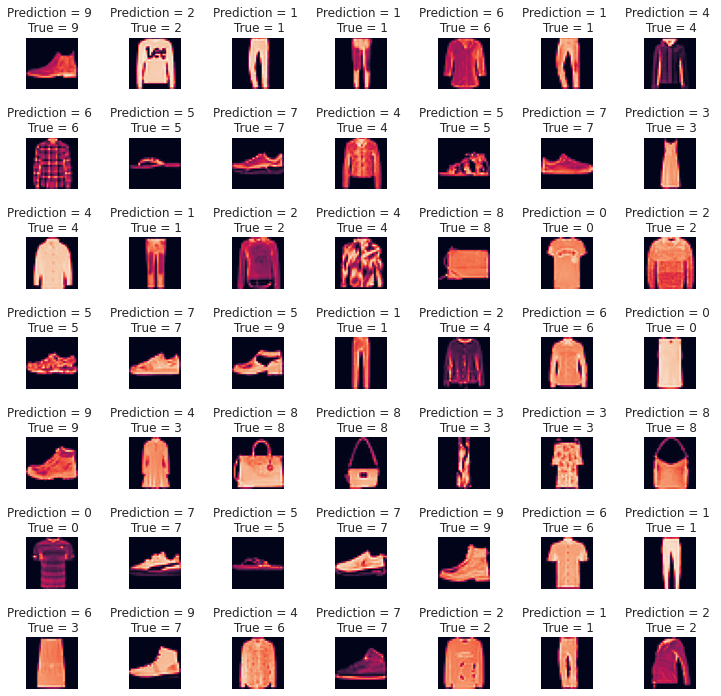

In [ ]:
# Printing matrix of 7 images for test data

from IPython.core.pylabtools import figsize
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {} \n True = {}' .format(classes_x[i], y_test[i])) 
  axes[i].axis('off') 
  plt.subplots_adjust(hspace = 0.9)
  plt.subplots_adjust(wspace = 1)

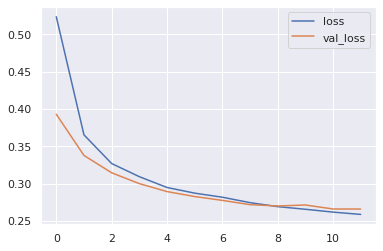

In [ ]:
# plot the training and validation accuracy at each epochs:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

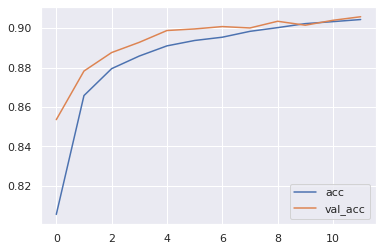

In [ ]:
# Plot accuracy per iteration

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

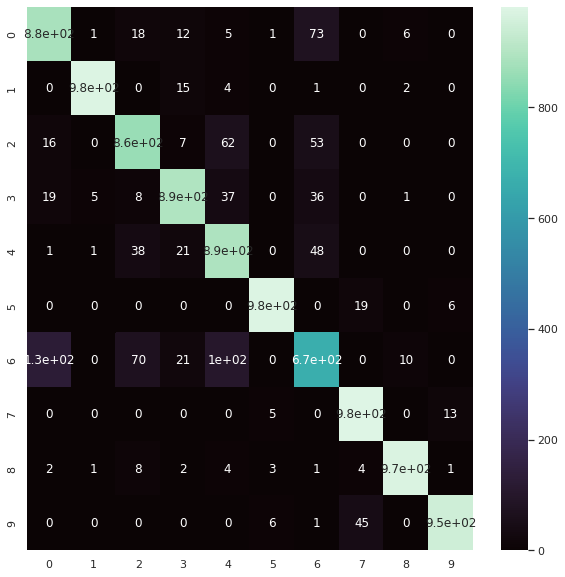

In [ ]:
# Confusion Matrix to summarize all the results in one location

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, classes_x)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, cmap="mako", annot = True)

## **ADDING MORE LAYERS AND DROPOUT**

In [ ]:
from keras.constraints import maxnorm

model_Fmnist = Sequential()
model_Fmnist.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1), kernel_constraint=maxnorm(3)))
model_Fmnist.add(Dropout(0.2))
model_Fmnist.add(Conv2D(filters = 32, padding = 'same', kernel_size = (3,3), activation = 'relu', kernel_constraint=maxnorm(3)))
model_Fmnist.add(MaxPooling2D(2,2))

model_Fmnist.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_constraint=maxnorm(3)))
model_Fmnist.add(Dropout(0.2))
model_Fmnist.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_constraint=maxnorm(3)))
model_Fmnist.add(MaxPooling2D(2,2))


model_Fmnist.add(Flatten())
model_Fmnist.add(Dropout(0.2))

model_Fmnist.add(Dense(units = 512, activation = 'relu', kernel_constraint=maxnorm(3)))
model_Fmnist.add(Dropout(0.2))
model_Fmnist.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum = 0.9, decay = decay, nesterov=False)
model_Fmnist.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model_Fmnist.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 dropout_4 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 64)        0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model_Fmnist.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))

Epoch 1/12
1875/1875 [==============================] - 333s 178ms/step - loss: 0.3489 - accuracy: 0.8710 - val_loss: 0.3254 - val_accuracy: 0.8796
Epoch 2/12
1875/1875 [==============================] - 333s 177ms/step - loss: 0.3120 - accuracy: 0.8841 - val_loss: 0.2976 - val_accuracy: 0.8902
Epoch 3/12
1875/1875 [==============================] - 337s 179ms/step - loss: 0.2908 - accuracy: 0.8921 - val_loss: 0.2863 - val_accuracy: 0.8954
Epoch 4/12
1875/1875 [==============================] - 337s 180ms/step - loss: 0.2776 - accuracy: 0.8980 - val_loss: 0.2755 - val_accuracy: 0.8973
Epoch 5/12
1875/1875 [==============================] - 334s 178ms/step - loss: 0.2676 - accuracy: 0.9019 - val_loss: 0.2669 - val_accuracy: 0.9011
Epoch 6/12
1875/1875 [==============================] - 350s 186ms/step - loss: 0.2583 - accuracy: 0.9038 - val_loss: 0.2740 - val_accuracy: 0.8970
Epoch 7/12
1875/1875 [==============================] - 336s 179ms/step - loss: 0.2534 - accuracy: 0.9072 - val_

In [ ]:
#final evaluation of the model

scores=model_Fmnist.evaluate(X_test, y_test, verbose=0)
print("Accuracy = %.2f%% " % (scores[1]*100))

Accuracy = 90.88% 


In [ ]:
predict_x = model_Fmnist.predict(X_test) 
classes_x = np.argmax(predict_x,axis=1)
classes_x

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test = y_test.argmax(1)
X_test = X_test.reshape((X_test.shape[0], 28, 28))

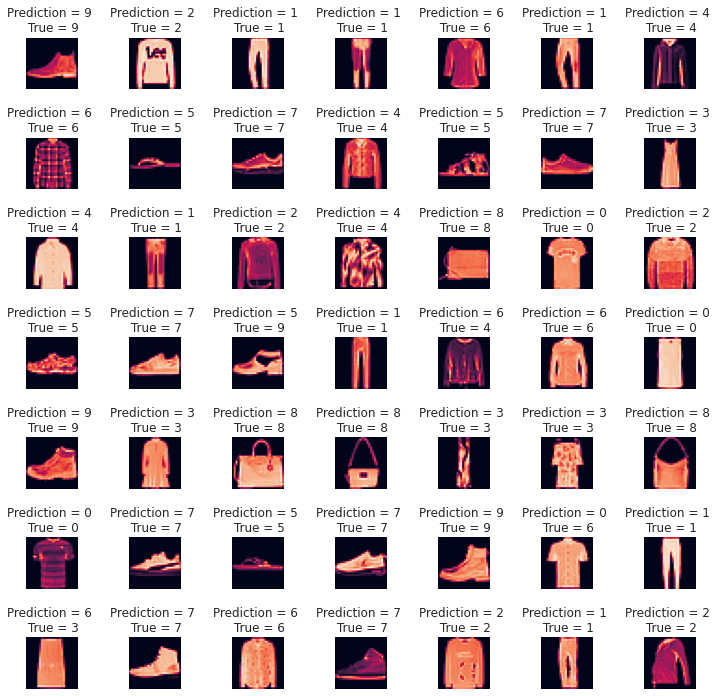

In [ ]:
from IPython.core.pylabtools import figsize
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {} \n True = {}' .format(classes_x[i], y_test[i])) 
  axes[i].axis('off') 
  plt.subplots_adjust(hspace = 0.9)
  plt.subplots_adjust(wspace = 1)

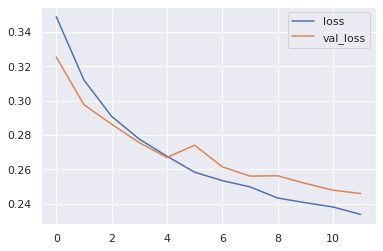

In [ ]:
# plot the training and validation accuracy at each epochs:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

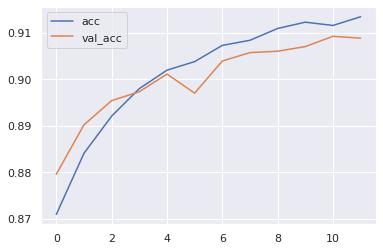

In [ ]:
# Plot accuracy per iteration

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

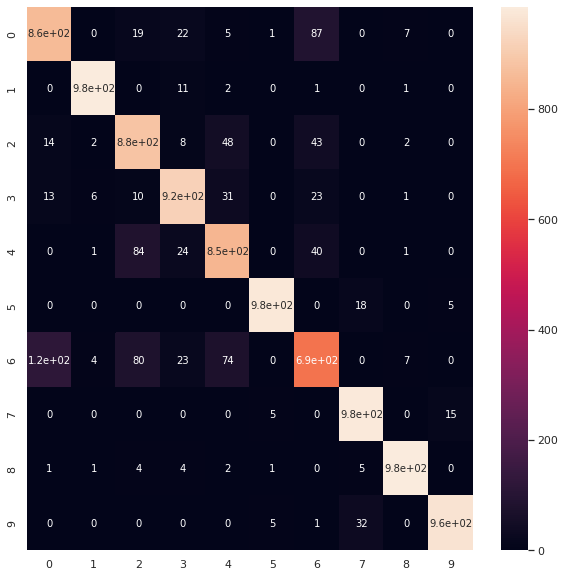

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, classes_x)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)